<a href="https://colab.research.google.com/github/evicsouza/ArtificialNeuralNetwork-MultilayerPerceptron/blob/main/Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import glob
import pandas as pd
from google.colab import files

uploaded = files.upload()

extensao = 'csv'
arquivos_csv = [i for i in glob.glob('*.{}'.format(extensao))]
concatenado = pd.concat([pd.read_csv(f, sep=';') for f in arquivos_csv ])


Saving diabetes.csv to diabetes.csv


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


,preg,plas,pres,skin,insu,mass,pedi,age,classDiabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


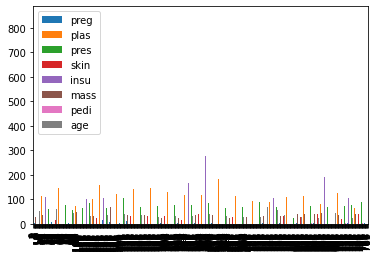

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataFrame = pd.read_csv('diabetes.csv')
display(dataFrame)
dataFrame.plot(kind = 'bar')
dataFrame_colString = dataFrame.select_dtypes(include = object)
dataFrame_colString.head() 
dataFrame['class'] = np.where(dataFrame['class'].eq('tested_positive'), True, False)
len(dataFrame)
dataFrame.ndim
dataFrame.size
dataFrame.rename(columns={'class': 'classDiabetes'}, inplace = True)
display(dataFrame)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   preg           768 non-null    int64  
 1   plas           768 non-null    int64  
 2   pres           768 non-null    int64  
 3   skin           768 non-null    int64  
 4   insu           768 non-null    int64  
 5   mass           768 non-null    float64
 6   pedi           768 non-null    float64
 7   age            768 non-null    int64  
 8   classDiabetes  768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


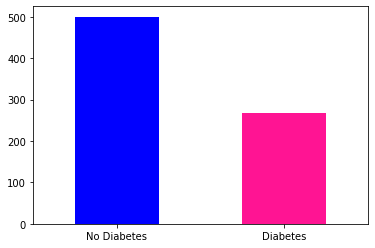

In [18]:
dataFrame["classDiabetes"].value_counts().plot(kind="bar",color=["blue","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);
dataFrame.info()

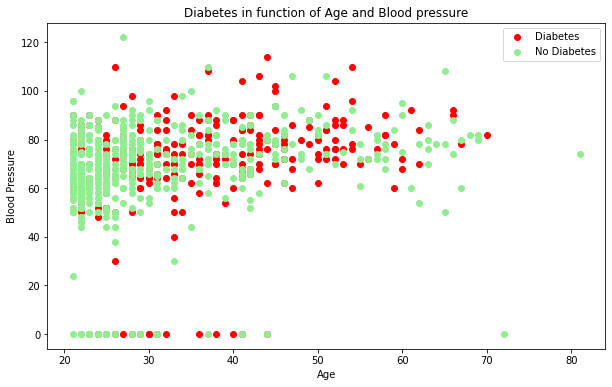

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(dataFrame.age[dataFrame.classDiabetes==1],dataFrame.pres[dataFrame.classDiabetes==1],c="Red");

plt.scatter(dataFrame.age[dataFrame.classDiabetes==0],dataFrame.pres[dataFrame.classDiabetes==0],c="lightgreen");

plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

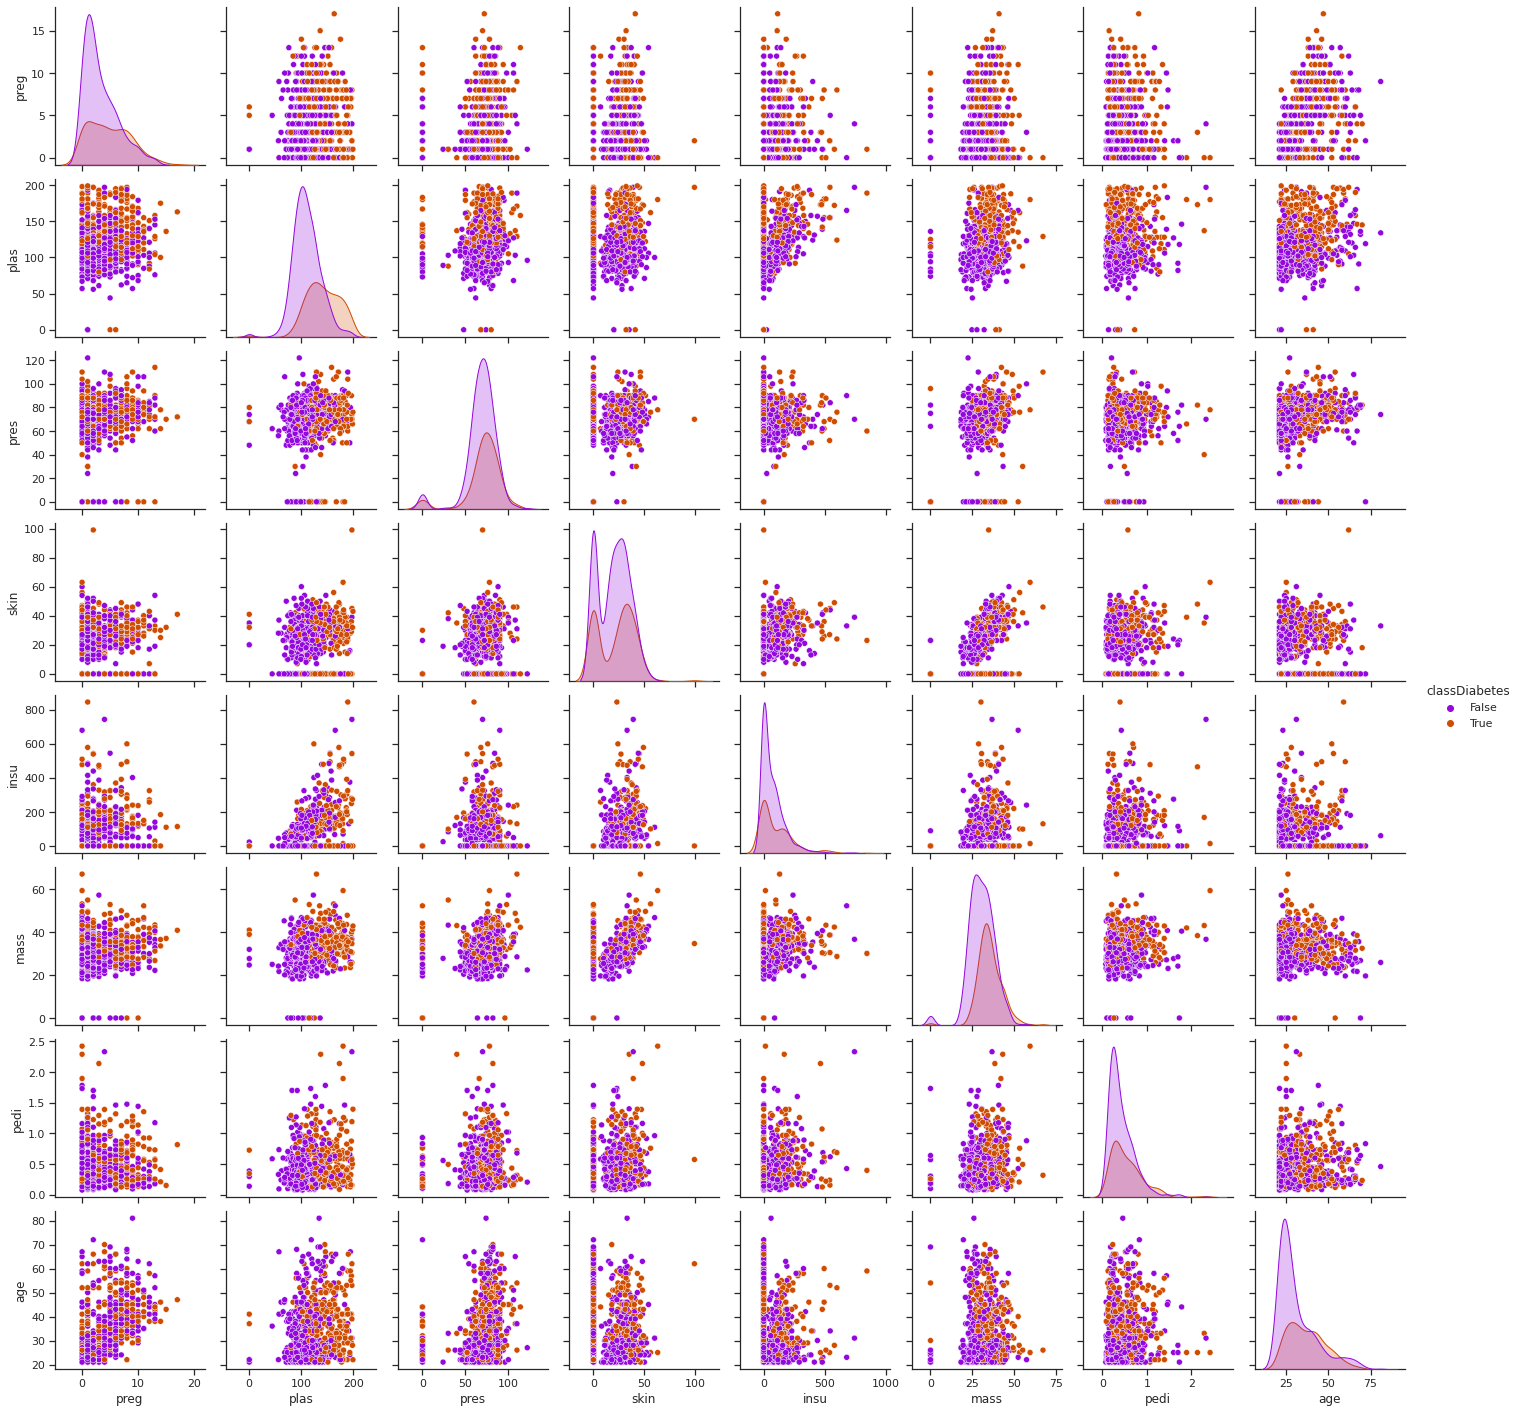

In [23]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataFrame,hue='classDiabetes',palette='gnuplot');

In [27]:
from sklearn.model_selection import train_test_split

dataFrame.sample(frac=1)

X = dataFrame.drop("classDiabetes",axis=1)
y = dataFrame["classDiabetes"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25)
(len(X_train),len(X_test))


(576, 192)

In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
log_reg = log_reg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
## KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
knn = knn.score(X_test,y_test)

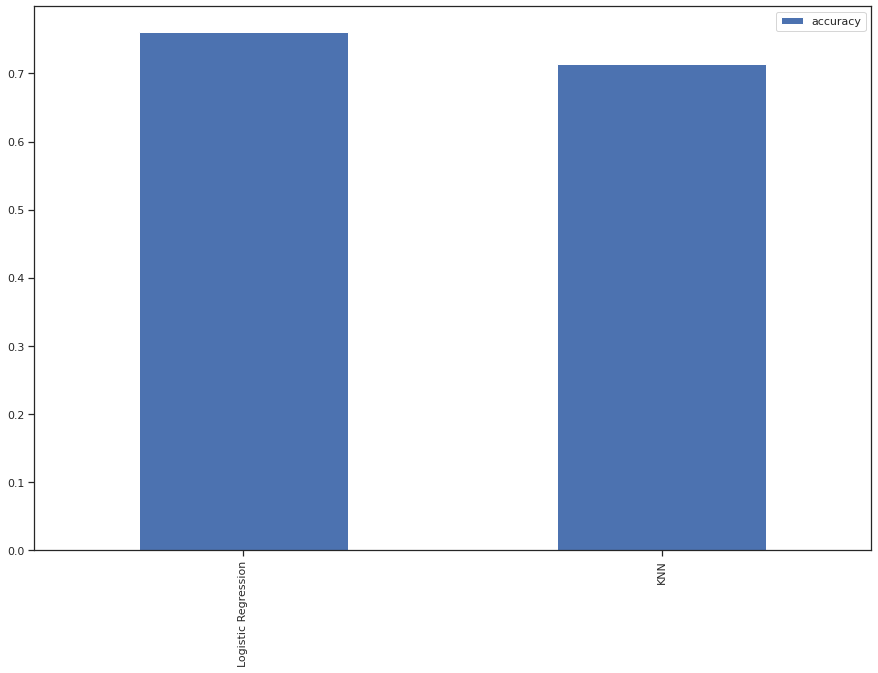

In [34]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,"KNN":knn}, index=["accuracy"])
model_compare
model_compare.T.plot.bar(figsize=(15,10));


In [38]:
from sklearn.model_selection import RandomizedSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
score = rs_log_reg.score(X_test,y_test)
score

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.7604166666666666

In [41]:
from sklearn.model_selection import GridSearchCV
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid search cv
gs_log_reg.fit(X_train,y_train)
gs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.7604166666666666

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


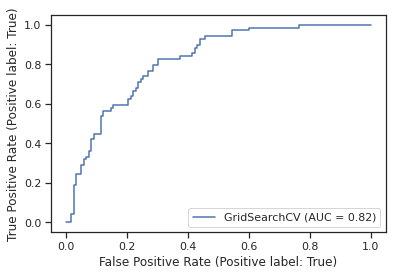

In [46]:
from sklearn.metrics import plot_roc_curve
y_preds = gs_log_reg.predict(X_test)
y_preds
np.array(y_test)
plot_roc_curve(gs_log_reg,X_test,y_test)


              precision    recall  f1-score   support

       False       0.78      0.87      0.82       123
        True       0.71      0.57      0.63        69

    accuracy                           0.76       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.76      0.75       192



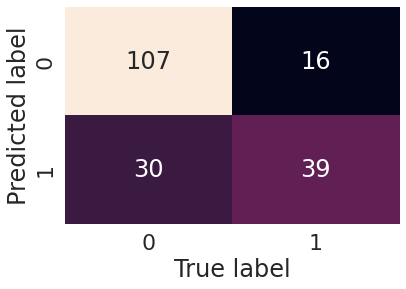

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

sns.set(font_scale=2)
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label")

print(classification_report(y_test, y_preds))



In [60]:
from sklearn.model_selection import cross_val_score
gs_log_reg.best_params_
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")
cv_acc = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc


0.75

In [61]:
cv_precision = cross_val_score(clf, X, y,cv=10, scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7142036215119739

In [62]:
cv_recall = cross_val_score(clf, X, y, cv=10, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.48091168091168085

In [63]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=10, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.569372018074834

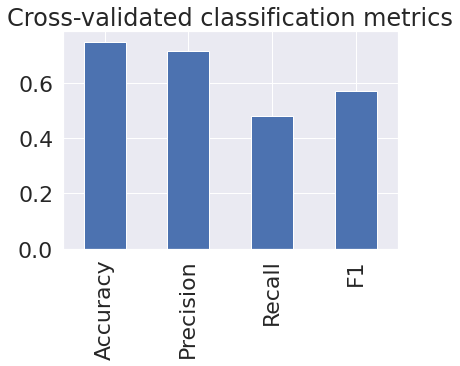

In [64]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_precision, "Recall": cv_recall, "F1": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [68]:
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

clf.fit(X_train, y_train);
clf.coef_

feature_dict = dict(zip(dataFrame.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.005107110634677071,
 'insu': 6.668666405158198e-05,
 'mass': 0.022302675715509507,
 'pedi': 0.24107618276549694,
 'plas': 0.02185873797746304,
 'preg': 0.11444846549794814,
 'pres': -0.023595181857656643,
 'skin': -0.0008715547302358215}

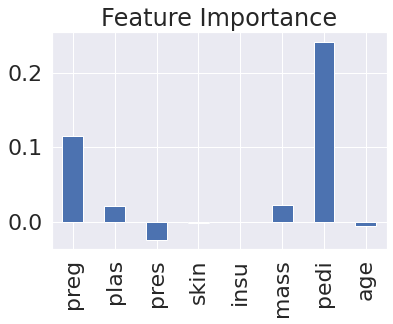

In [69]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [71]:
import pickle

# Save trained model to file
pickle.dump(gs_log_reg, open("Diabetes.pkl", "wb"))
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.7604166666666666

In [72]:
X_test.head(1)


,preg,plas,pres,skin,insu,mass,pedi,age
138,0,129,80,0,0,31.2,0.703,29


In [73]:
preg = input()
plas = input()
press = input()
skin = input()
insu = input()
mass = input()
pedi = input()
age = input()

45
20
30
2
123
58
33
19


In [75]:
row_df = pd.DataFrame([pd.Series([preg,plas,press,skin,insu,mass,pedi,age])])
row_df


,0,1,2,3,4,5,6,7
0,45,20,30,2,123,58,33,19


In [77]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

The probability of you having Diabetes is 0.9999999999999831


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [78]:
loaded_model.predict(row_df)[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


True